<a href="https://colab.research.google.com/github/Vykhrystenko/NM_FIT_2_9_Vykhrystenko/blob/main/%D0%9B%D0%A0_%E2%84%9613_%D0%92%D0%B8%D1%85%D1%80%D0%B8%D1%81%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

Вихристенко Владислав. Варіант 3

#Метод Ейлера

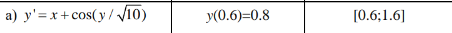

x = [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 
y = [0.8    0.9568 1.1223 1.296  1.4778 1.667  1.8635 2.0666 2.276  2.4912
 2.7117]


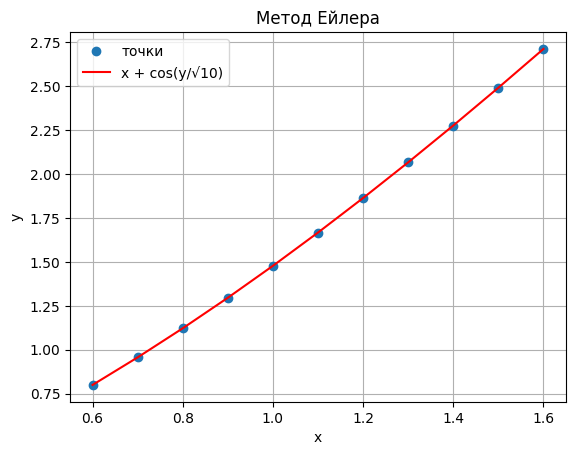

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y/np.sqrt(10))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 0.6, 1.6, 0.1, 0.8

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + cos(y/√10)"])
plt.grid()
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

In [ ]:
#Додати перевірку odeint для першого завдання


x= [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
y= [0.8        0.96114378 1.13071934 1.30837024 1.49371071 1.68632939
 1.88579417 2.09165753 2.3034627  2.52075019]


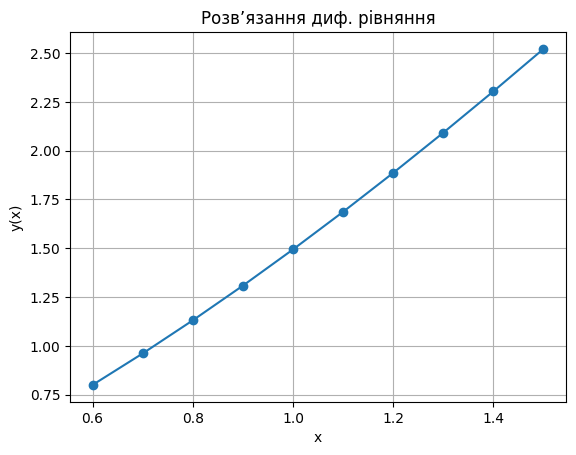

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y/np.sqrt(10))

# Початкова умова
y0 = 0.8

# Значення x
x = np.arange(0.6, 1.6, 0.1)


# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

In [ ]:
#додати перевірку solve_ivp для перешого завдання

x= [0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6]
y= [0.8        0.96114401 1.13073072 1.30839226 1.49373101 1.68633618
 1.88578388 2.09163708 2.30344562 2.52074622 2.74306538]


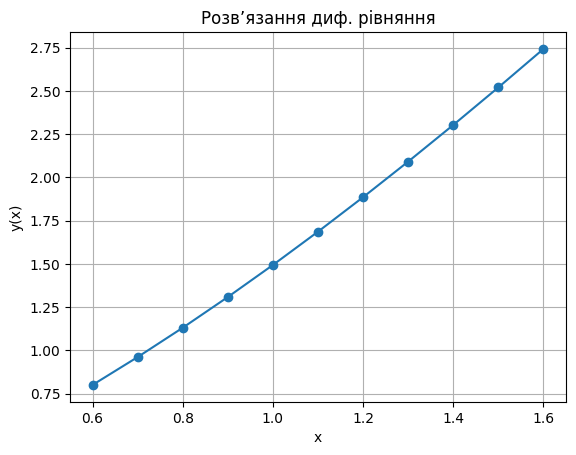

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y/np.sqrt(10))

# Початкова умова
y0 = [0.8]  # Потрібно передати як список

# Значення x
x = np.linspace(0.6, 1.6,11)

# Розв'язання ODE
sol = solve_ivp(model, [0.6, 1.6], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Метод Ейлера-Коші

image.png

x = [1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4] 
y = [2.2    2.4183 2.6518 2.9003 3.1635 3.4408 3.7315 4.0346 4.3492 4.6739
 5.0075]


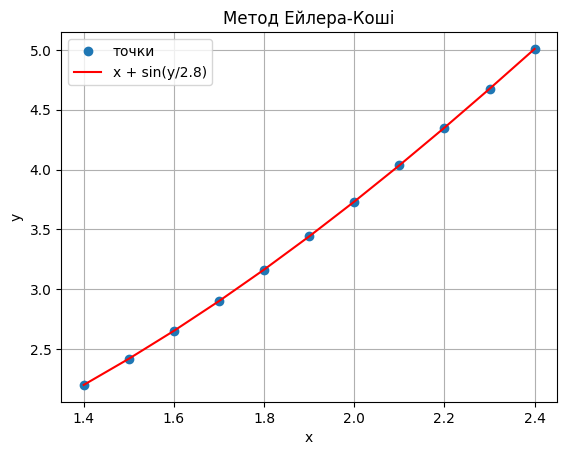

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y/2.8)

a = 1.4  # ліва межа відрізку
b = 2.4  # права межа відрізку
h = 0.1  # крок
y0 = 2.2  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.arange(a, b + h, h)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "x + sin(y/2.8)"])
plt.grid()
plt.show()
